# Importing modules

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.pipeline import Pipeline

# importing Dataset

In [2]:
data=pd.read_csv('C:\\Users\\ANIRUDDHA\\Documents\\data_science\\IMDb_Movies_India.csv',encoding='ISO-8859-1')
data.head(20)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


# Data Overview

In [3]:
def dataoverview(df,messege):
    print(f'{messege}:\n')
    print("Rows: ",data.shape[0])
    print('\nNumber of features: ',data.shape[1])
    print('\nFeatures:')
    print(data.columns.tolist())
    print('\nMissing values is: ',data.isnull().sum().values.sum())
    print("\nUnique values: ")
    print(data.nunique())

In [4]:
dataoverview(data,'Overview is:')

Overview is::

Rows:  15509

Number of features:  10

Features:
['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

Missing values is:  33523

Unique values: 
Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64


# Finding missing values

In [5]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# Value count

In [7]:
data['Genre'].value_counts()

Drama                         2780
Action                        1289
Thriller                       779
Romance                        708
Drama, Romance                 524
                              ... 
Action, Musical, War             1
Horror, Crime, Thriller          1
Animation, Comedy                1
Romance, Action, Crime           1
Adventure, Fantasy, Sci-Fi       1
Name: Genre, Length: 485, dtype: int64

In [8]:
data['Director'].value_counts()

Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: Director, Length: 5938, dtype: int64

In [9]:
data['Actor 1'].value_counts()

Ashok Kumar           158
Dharmendra            140
Jeetendra             140
Mithun Chakraborty    133
Amitabh Bachchan      129
                     ... 
Vatsal Sheth            1
Ujala Baboria           1
Dimple Sewak            1
Komal Leels             1
Sangeeta Tiwari         1
Name: Actor 1, Length: 4718, dtype: int64

# Remove null values

In [10]:
data.dropna(subset=['Name','Year','Duration','Votes','Rating'],inplace=True)
data.isna().sum()

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64

# Remove parenthesis from Date

In [11]:
data['Year']=data['Year'].str.strip('()').astype(int)

# Remove comma from Votes

In [12]:
data['Votes']=data['Votes'].str.replace(',','').astype(int)

# Remove min from Duration

In [13]:
data['Duration']=data['Duration'].str.replace('min','').astype(int)

# New Info

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5820 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int32  
 6   Director  5850 non-null   object 
 7   Actor 1   5776 non-null   object 
 8   Actor 2   5734 non-null   object 
 9   Actor 3   5688 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 434.3+ KB


In [15]:
data.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


# Drop column

In [16]:
data.drop('Genre',axis=1,inplace=True)

# Exploratory data analysis

C:\Users\ANIRUDDHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ANIRUDDHA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


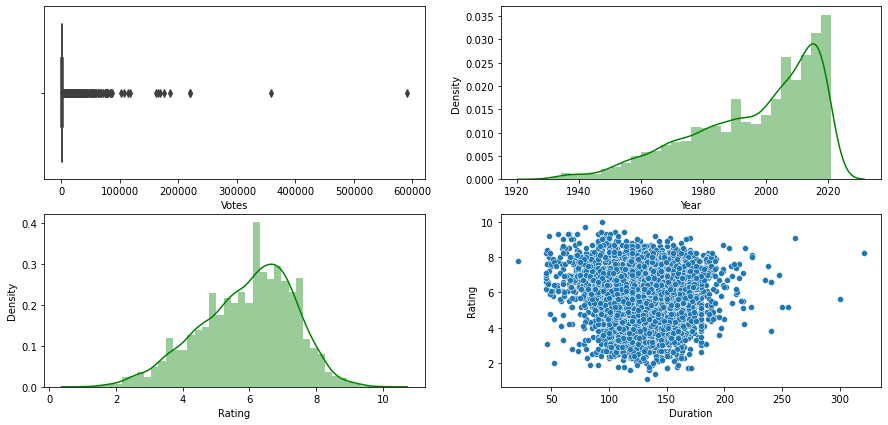

In [20]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(data=data,x='Votes')

plt.subplot(2,2,2)
sns.distplot(data['Year'],color='green')

plt.subplot(2,2,3)
sns.distplot(data['Rating'],color='green')

plt.subplot(2,2,4)
sns.scatterplot(data=data,x=data['Duration'],y=data['Rating'])

plt.show()

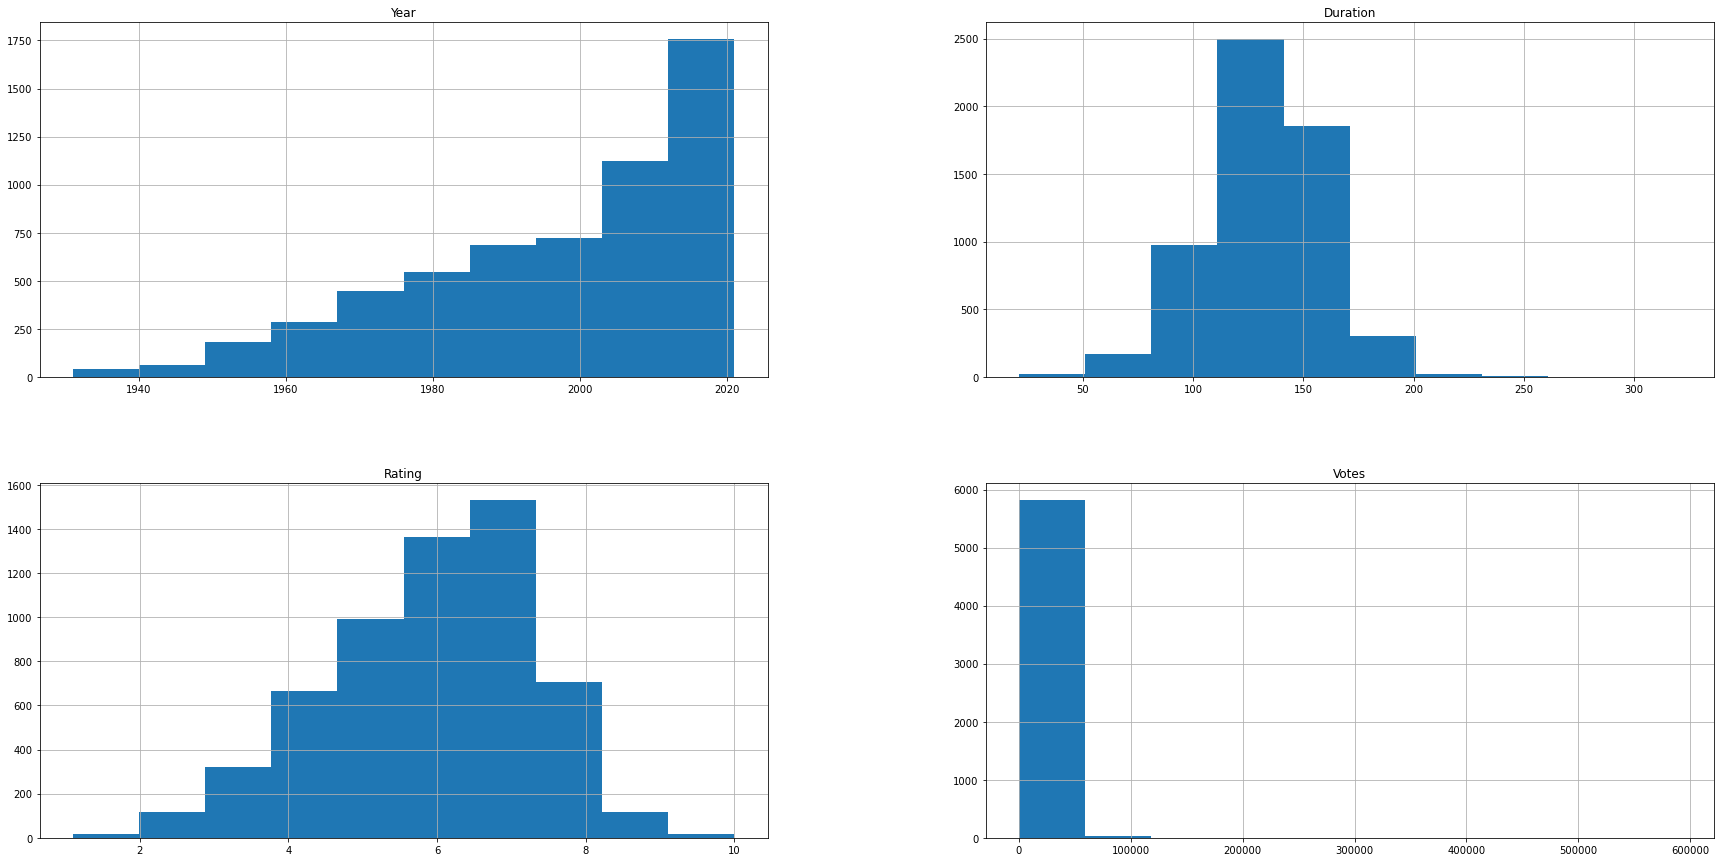

In [19]:
data.hist(figsize=(30,15))
None

# Heatmap implement

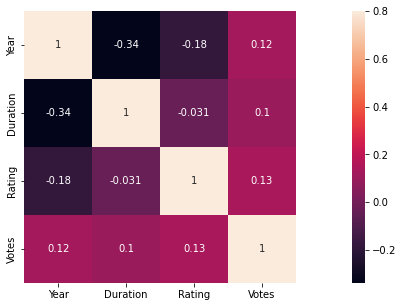

In [22]:
corrmat=data.corr()
fig=plt.figure(figsize=(20,5))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True)
plt.show()

# Drop the column

In [24]:
data.drop(['Name','Director','Actor 1','Actor 2','Actor 3'],axis=1,inplace=True)

In [26]:
data.head(20)

,Year,Duration,Rating,Votes
1,2019,109,7.0,8
3,2019,110,4.4,35
5,1997,147,4.7,827
6,2005,142,7.4,1086
8,2012,82,5.6,326
9,2014,116,4.0,11
10,2004,96,6.2,17
11,2016,120,5.9,59
12,1991,161,6.5,983
13,2012,166,5.7,512


# Feature Engineering

In [27]:
x=data[['Year','Duration','Votes']]
y=data['Rating']

# Training test data split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1000)

In [29]:
print(x_train)

       Year  Duration  Votes
12023  2008       120    251
8993   2018       130     10
371    2001       177   2192
2488   2009       103     85
11935  2003        50    268
...     ...       ...    ...
3561   2013       130    339
6175   1996       131    279
9913   1979       116     15
12469  2018       137     65
3780   1935       129      7

[4680 rows x 3 columns]


In [30]:
print(x_test)

       Year  Duration  Votes
7822   2020        85     15
4404   1957       137     14
6229   2003       137    719
11043  2015       164  19913
8850   1954       199     46
...     ...       ...    ...
6361   1977       112     46
480    2001       160    403
5658   2010       125     13
9063   2010       110    126
30     2005       116   1002

[1171 rows x 3 columns]


In [31]:
print(y_train)

12023    5.5
8993     2.8
371      7.2
2488     5.2
11935    6.1
        ... 
3561     2.4
6175     6.7
9913     6.8
12469    6.8
3780     5.7
Name: Rating, Length: 4680, dtype: float64


In [32]:
print(y_test)

7822     7.3
4404     6.4
6229     7.3
11043    4.4
8850     7.3
        ... 
6361     6.1
480      3.8
5658     6.0
9063     6.9
30       7.1
Name: Rating, Length: 1171, dtype: float64


# Model building

In [33]:
pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('sgd',SGDRegressor(max_iter=10000,random_state=1000))
])

In [34]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('sgd', SGDRegressor(max_iter=10000, random_state=1000))])

## predict the rating of test set

In [35]:
y_pred_pipeline=pipeline.predict(x_test)

# Model evaluation

In [36]:
mae_pipeline=mean_absolute_error(y_test,y_pred_pipeline)
mse_pipeline=mean_squared_error(y_test,y_pred_pipeline)
r2_pipeline=r2_score(y_test,y_pred_pipeline)

In [37]:
print('mean absolute error is: ',mae_pipeline)
print('mean squared error is: ',mse_pipeline)
print('r2 error is: ',r2_pipeline)

mean absolute error is:  1.040142363499226
mean squared error is:  1.75589466147756
r2 error is:  0.037929023872087186


# Model deployment

In [38]:
new_input=pd.DataFrame({
    'Year':[2023],
    'Duration':[120],
    'Votes':[10000],
})
predict_rating=pipeline.predict(new_input)
print('predict rating is: ',predict_rating)

predict rating is:  [5.69062882]
